# Project

The goal with this project is predicting the ratings of the apps

## Load Libraries

We start by loading necessary libraries that will help us with our analysis.

In [1]:
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt  # Plotting 
%matplotlib inline

## Load Dataset:

In [2]:
data = pd.read_csv('/Users/eva/Desktop/UCSC/predictive/final project/data/googleplaystore.csv')

In [3]:
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()   # Checking data type & null values


 	 The data frame has 10841 rows and 13 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From looking at the dataset info above, all of columns are object types except the target column (Rating) which is float. Therefore 'Rating' is the only numerical column in the data. Installs, Rating, Price, and Size features are all objects. They will need to be processed so that they can be read as numbers.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Find total missing values
print('Missing values:\n{}'.format(data.isnull().sum()))

Missing values:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


There are missing values in 'Rating', 'Type', 'Content Rating', 'Current Version' and 'Android Version'. But there are considerable amounts of missing values in the 'Rating' column. As our objective is to predict the ratings of the apps we will need to remove these missing values. We will deal with this later on in the cleaning stage.

## Data Preprocessing

We will look at each feature individually:

### App Names:

Lets look into frequency of each item to get an idea of the data:

In [6]:
data.App.value_counts().head()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Name: App, dtype: int64

Check for duplicate values: 

In [7]:
print("Total Number of App names = ", data.shape[0])
print("Total Number of Unique App names = ", len(data['App'].unique()))
print("Number of Duplicate Apps = ",data.shape[0]- len(data['App'].unique()))


Total Number of App names =  10841
Total Number of Unique App names =  9660
Number of Duplicate Apps =  1181


We can see that there are 1181 duplicate apps, and this is true as some apps like 'ROBLOX' appear 9 times:

In [8]:
data.loc[data.App=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We remove any duplicate apps from the dataset:

In [9]:
data.drop_duplicates(subset='App', inplace=True)

In [10]:
print('Number of apps in the dataset : ' , len(data))

Number of apps in the dataset :  9660


In [11]:
# Check frequency of Aps after duplicate removal:
data['App'].value_counts().head()

ExtendedCare Virtual Care Room        1
Sam.BN                                1
Masha and the Bear. Games for kids    1
EC music dictionary                   1
Baldur's Gate II                      1
Name: App, dtype: int64

### Installs:

In [12]:
data['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

We can see that 1 value is 'Free' (string) and the rest are numeric but with a '+' and ','

In [13]:
# Checking which row contains 'Free' for Number of Installs:
data.loc[data.Installs == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We run in to a problem on row 10472 of our dataset. It looks like this row was copied incorrectly during the data-scraping phase. It seems to be missing a 'Category' type and so all values are in the wrong position. We remove this row while cleaning the 'Number of Installs' column.

We need to remove '+' or ',' from the 'Number of Installs' column to make the values numeric. We also apply if a value is of type string instance to change to a float. 

In [14]:
# Removing all non-numeric values ('Free') from 'Installs' column:
data = data[data['Installs'] != 'Free']

data['Installs']=data['Installs'].apply(lambda x: x.strip('+'))
data['Installs']=data['Installs'].apply(lambda x: x.replace(',',''))
data['Installs'] = data['Installs'].apply(lambda x: int(x))

data['Installs'].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [15]:
data['Installs'].head(10)

0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
6       50000
7     1000000
8     1000000
9       10000
Name: Installs, dtype: int64

### App Size:

In [16]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

Next, we convert all 'App Sizes' to MB and while doing so we remove 'M', 'k' and 'Varies with device'.

In [17]:
# Replace 'Varies with Size' with 'NaN':
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
# Remove 'M' from 'Size' values:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
# Remove ',' from 'M' values in Size:
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
# Remove 'k' from values in size and divide by 1000:
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
# Convert 'Size' column to type float:
data['Size'] = data['Size'].apply(lambda x: float(x))
data['Size'].head(10)


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
5     5.6
6    19.0
7    29.0
8    33.0
9     3.1
Name: Size, dtype: float64

### Price:

In [18]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have some prices that seem very high for an app. We will investigate this to see if there is a problem with the data.

We need to remove $ symbol from our 'Price' column and we convert this column to type float:

In [19]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Price'].head(10)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Price, dtype: float64

We investigate apps that have a high price (i.e. > $100):

In [20]:
temp=data['Price'].apply(lambda x: True if x>100 else False)
data[temp].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


It appears that there are apps available that have high prices and it seems that these apps are purchased!

### Reviews:

In [21]:
data['Reviews'].head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object

Looking at ' Number of Reviews' column we need to change this data type to int:

In [22]:
data['Reviews'] = data['Reviews'].astype(int)
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

We have converted Installs, Rating, Price, and Size features to integers/floats.

We now check on our data-set to see how we are getting on during data cleaning phase:

In [23]:
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()   # Checking data type


 	 The data frame has 9659 rows and 13 columns. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null int64
Type              9658 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


### Category:

In [24]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [25]:
data['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

The 'Category' column has no missing data or duplicate categories.

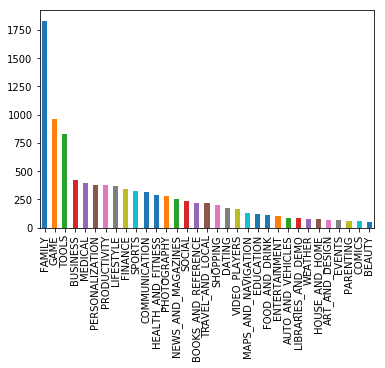

In [26]:
# Number of Apps in each category:
data['Category'].value_counts().plot(kind='bar')


Family and Game categories are the most popular Apps in the Google Play Store

### Content Rating:

In [27]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [28]:
data['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

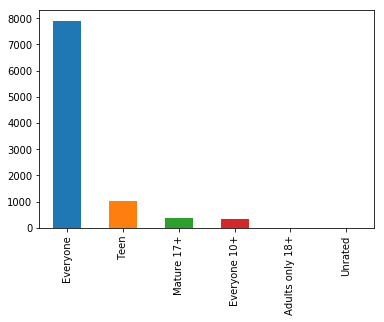

In [29]:
data['Content Rating'].value_counts().plot(kind='bar')

'Content Rating' has no unusual values present. 

### Genres:

In [30]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The 'Genre' column is in the format Category;Subcategory. We divide the data into two columns, one as primary category and the other as secondary, using ; as separator.

In [31]:
sep = ';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Primary Genres:']=rest
data['Primary Genres:'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Primary Genres:, dtype: object

In [32]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Secondary Genres:']=rest
data['Secondary Genres:'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Secondary Genres:, dtype: object

In [33]:
grouped = data.groupby(['Primary Genres:','Secondary Genres:'])
grouped.size().head(15)

Primary Genres:  Secondary Genres: 
Action           Action                299
                 Action & Adventure     12
Adventure        Action & Adventure      5
                 Adventure              73
                 Brain Games             1
                 Education               1
Arcade           Action & Adventure     14
                 Arcade                184
                 Pretend Play            1
Art & Design     Action & Adventure      1
                 Art & Design           57
                 Creativity              6
                 Pretend Play            1
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

In [34]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Primary Genres:,Secondary Genres:
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Art & Design,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Art & Design,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Art & Design,Creativity


## Missing Values:

Next, we will deal with missing values in our data set:

In [35]:
print('We have have the following rows and columns:',data.shape)


We have have the following rows and columns: (9659, 15)


In [36]:
# Find total missing values

total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'], sort=False)
missing_data


,Total,%
Rating,1463,15.1
Size,1227,12.7
Current Ver,8,0.1
Android Ver,2,0.0
Type,1,0.0
Secondary Genres:,0,0.0
Primary Genres:,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0


We have two options with dealing with the missing values. We either remove these missing values but this method reduces the quality of our model as it reduces our sample size. Another option is to replace missing values with a specific value like (mean, median or mode) value of the column.

Our Rating and Size columns have a very high amount of missing values, just over 15% and 12%, respectively. We examine these features further.

In [37]:
# Summary Stats on Rating:
data['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


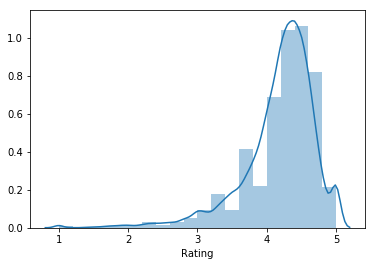

In [38]:
# Ratings
sns.distplot(data['Rating'].dropna(),hist=True,bins=20)

In [39]:
# Summary Sats on Size:
data['Size'].describe()

count    8432.000000
mean       20.395289
std        21.827542
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


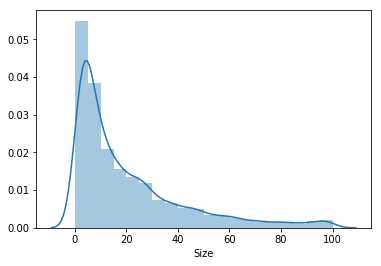

In [40]:
# Size
sns.distplot(data['Size'].dropna(),hist=True,bins=20)

We decide to fill any missing values in the Rating column with the mean.

In [41]:
mean_value=data['Rating'].mean()
data['Rating']=data['Rating'].fillna(mean_value)

Similarly, we decide to fill any missing values in the Size column wiht the median.

In [42]:
median_value=data['Size'].median()
data['Size']=data['Size'].fillna(median_value)

In [43]:
print('Missing values:\n{}'.format(data.isnull().sum()))

Missing values:
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Primary Genres:      0
Secondary Genres:    0
dtype: int64


The remaining missing values are in 'Type', 'Current Ver' and 'Android Ver'.

In [44]:
# Remove missing values from'Type':
data = data.dropna(subset=['Type'])

In [45]:
# Check that missing values have been removed:
print('Missing values:\n{}'.format(data.isnull().sum()))

Missing values:
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Primary Genres:      0
Secondary Genres:    0
dtype: int64


We drop the columns 'Last Updated', 'Current Version' and 'Android Version' as we feel that they are irrelevant in our predictive study.

We also delete the 'Genres' column as earlier we split this feature in to two seperate columns.

In [46]:
data.drop(labels = ['Content Rating','Last Updated','Current Ver','Android Ver', 'Genres'], axis = 1, inplace = True)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
print('Missing values:\n{}'.format(data.isnull().sum()))

Missing values:
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Primary Genres:      0
Secondary Genres:    0
dtype: int64


In [48]:
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()


 	 The data frame has 9658 rows and 10 columns. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 10 columns):
App                  9658 non-null object
Category             9658 non-null object
Rating               9658 non-null float64
Reviews              9658 non-null int64
Size                 9658 non-null float64
Installs             9658 non-null int64
Type                 9658 non-null object
Price                9658 non-null float64
Primary Genres:      9658 non-null object
Secondary Genres:    9658 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 830.0+ KB


In [49]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Primary Genres:,Secondary Genres:
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Art & Design,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Art & Design,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Art & Design,Creativity


In [50]:
# Data Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9658.0,4.173243e+00,4.943381e-01,1.0000,4.0,4.2,4.5,5.000000e+00
Reviews,9658.0,2.166150e+05,1.831413e+06,0.0000,25.0,967.0,29408.0,7.815831e+07
Size,9658.0,1.932958e+01,2.058561e+01,0.0085,5.3,12.0,25.0,1.000000e+02
Installs,9658.0,7.778312e+06,5.376100e+07,0.0000,1000.0,100000.0,1000000.0,1.000000e+09
Price,9658.0,1.099413e+00,1.685302e+01,0.0000,0.0,0.0,0.0,4.000000e+02


## Data Analysis

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating Vs Reveiws')

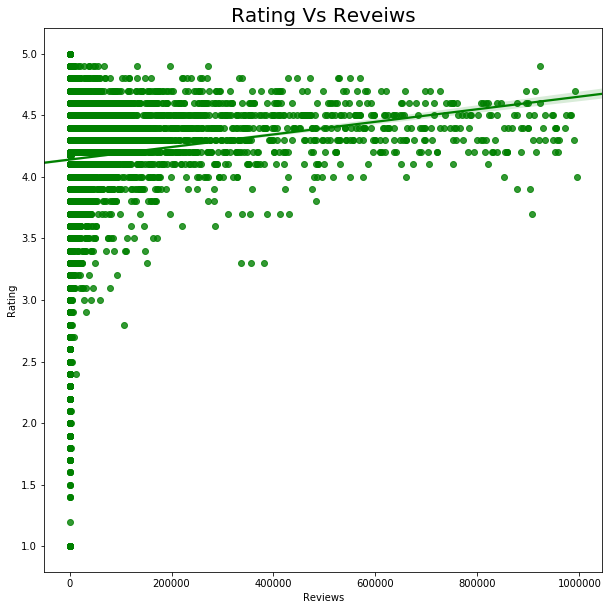

In [51]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'green',data=data[data['Reviews']<1000000]);
plt.title('Rating Vs Reveiws',size = 20)

From looking at Seem like well-known application will get a good rating


In [52]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055012,0.048496,0.040068,-0.019534
Reviews,0.055012,1.000000,0.066213,0.625164,-0.007599
Size,0.048496,0.066213,1.000000,0.030562,-0.019547
Installs,0.040068,0.625164,0.030562,1.000000,-0.009406
Price,-0.019534,-0.007599,-0.019547,-0.009406,1.000000


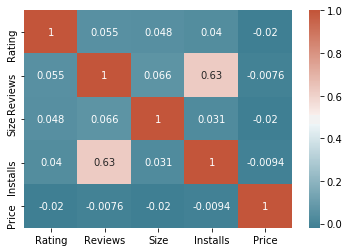

In [53]:
# plot the correlation using correrlation matrix:
corrmat = data.corr()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

A moderate positive correlation of 0.63 exists between the number of reviews and number of installs. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


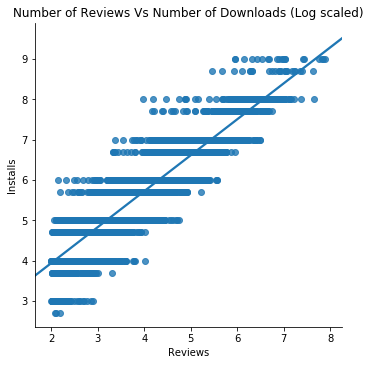

In [54]:
df_copy = data.copy()

df_copy = df_copy[df_copy.Reviews > 100]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(data['Installs'])
df_copy['Reviews'] = np.log10(data['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

In [55]:
#data['Type']=pd.get_dummies(data['Type'],)
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['Type'] = data['Type'].map(type_cat)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
data['Type']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
10811    0
10812    0
10813    0
10814    0
10815    0
10816    0
10817    0
10818    0
10819    0
10820    0
10821    0
10822    0
10823    0
10824    0
10825    0
10826    0
10827    0
10828    0
10829    0
10830    0
10831    0
10832    0
10833    0
10834    0
10835    0
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Type, Length: 9658, dtype: int64

In [57]:
# App
le = preprocessing.LabelEncoder()
data['App']=le.fit_transform(data['App'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# Category
le = preprocessing.LabelEncoder()
data['Category']=le.fit_transform(data['Category'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# Genres
#le = preprocessing.LabelEncoder()
#data['Genres']=le.fit_transform(data['Genres'])

In [60]:
#Primary Genres:
le = preprocessing.LabelEncoder()
data['Primary Genres:']=le.fit_transform(data['Primary Genres:'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
#Secondary Genres:
le = preprocessing.LabelEncoder()
data['Secondary Genres:']=le.fit_transform(data['Secondary Genres:'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Primary Genres:,Secondary Genres:
0,6961,0,4.1,159,19.0,10000,0,0.0,3,4
1,2632,0,3.9,967,14.0,500000,0,0.0,3,36
2,8655,0,4.7,87510,8.7,5000000,0,0.0,3,4
3,7826,0,4.5,215644,25.0,50000000,0,0.0,3,4
4,7021,0,4.3,967,2.8,100000,0,0.0,3,16


Transfer all data in to int/float

## Feature Selection

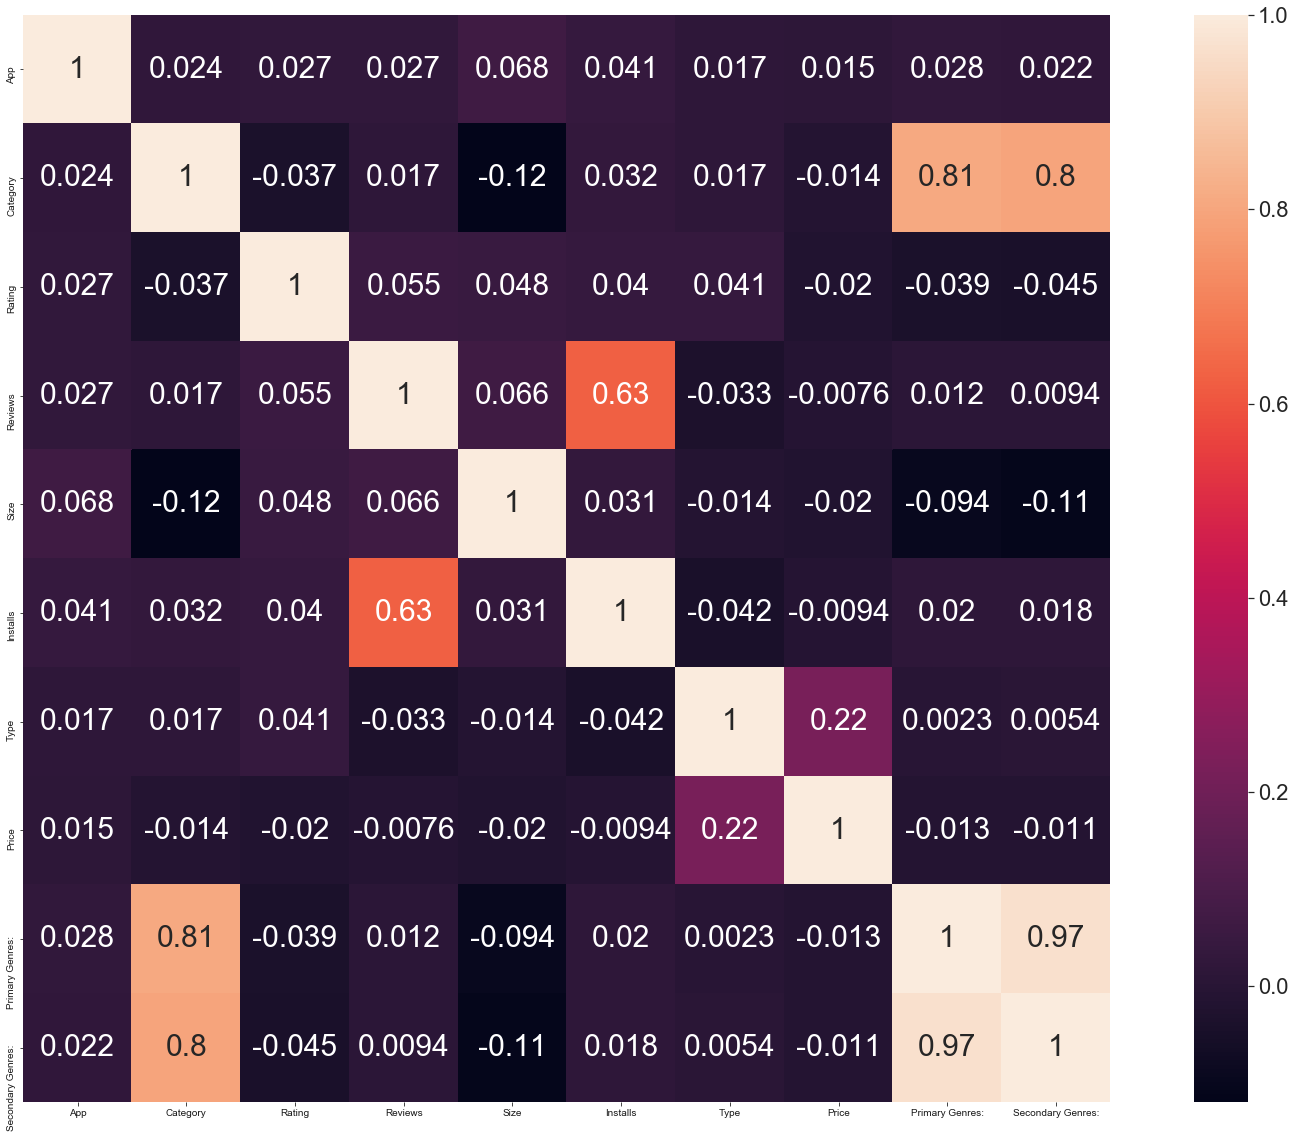

In [63]:
#Drawing the correlation figure
fig = plt.subplots(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap (data.corr(), square = True, cbar = True, annot = True, annot_kws = {'size': 30})
plt.show()

? corr very low, so I just use all features to predict rating

## Data Preparing

Splitting data into x and y

In [64]:
# Split data into training and testing sets
#drop'Content Rating', 'Last Updated', 'Current Ver','Android Ver','Gentes'
features = [ 'App','Size','Category','Reviews','Installs', 'Type', 'Price']
X = data[features]
y = data['Rating']

In [65]:
print(X.shape)
print(y.shape)

(9658, 7)
(9658,)


## Dimensional Reduction (PCA)

Text(0,0.5,'cumulative explained variance')

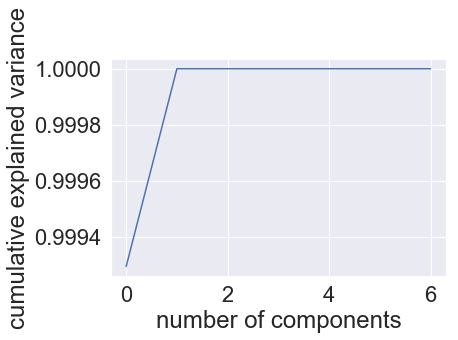

In [66]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [67]:
pca = PCA(n_components=7)
fit = pca.fit(X)

importances = fit.explained_variance_


import_list =pd.DataFrame(list(importances), list(X.columns))
import_list.columns =["importances"]
import_list.sort_values(by="importances", ascending = False)

,importances
App,2.891557e+15
Size,2.042275e+12
Category,7.760942e+06
Reviews,4.215744e+02
Installs,2.836235e+02
Type,6.918157e+01
Price,6.836882e-02


## Splitting training and testing datasets

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

80% training data and 20% testing data

## Scaling training data set

In [69]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##  Regression

### Evaluation

In [70]:
'''Explained variance score'''
'''The best possible score is 1.0, lower values are worse.'''
from sklearn.metrics import explained_variance_score
# print(explained_variance_score(y_test, y_pred))
'''Mean absolute error'''
from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test, y_pred))
'''Mean squared error'''
from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_test, y_pred))
'''Mean squared logarithmic error'''
from sklearn.metrics import mean_squared_log_error
# print(mean_squared_log_error(y_test, y_pred))
'''Median absolute error'''
from sklearn.metrics import median_absolute_error
# print(median_absolute_error(y_test, y_pred))
'''R² score, the coefficient of determination'''
'''Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).'''
from sklearn.metrics import r2_score
# print(r2_score(y_test, y_pred))

def evaluate_regression(y_test, y_pred):
    output = "Explained variance score: {}\n".format(explained_variance_score(y_test, y_pred))
    output += "Mean absolute error: {}\n".format(mean_absolute_error(y_test, y_pred))
    output += "Mean squared error: {}\n".format(mean_squared_error(y_test, y_pred))
    # output += "Mean squared logarithmic error: {}\n".format(mean_squared_log_error(y_test, y_pred))
    output += "Median squared error: {}\n".format(median_absolute_error(y_test, y_pred))
    output += "R² score: {}\n".format(r2_score(y_test, y_pred))
    return output

In [71]:
def plotting(y_test, y_pred, title, r_square):
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, c='r')
    plt.scatter(y_test, y_test)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.legend(('predicted', 'actual'), loc='lower right')
    plt.title("{} -> R²: {}".format(title, round(r_square, 2)))
    plt.show()

### Regression Function

In [72]:
def fit_data(regressor):
    print('================{}=================='.format(str(regressor.__class__.__name__)))
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(evaluate_regression(y_test, y_pred))
    plotting(y_test, y_pred, str(regressor.__class__.__name__), r2_score(y_test, y_pred))
    print('================{}=================='.format(str(regressor.__class__.__name__)))

### Do the regression

================LinearRegression==================
Explained variance score: 0.011918734132857267
Mean absolute error: 0.32670759136374944
Mean squared error: 0.23189374977285634
Median squared error: 0.2343763000899044
R² score: 0.011877890511715505



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


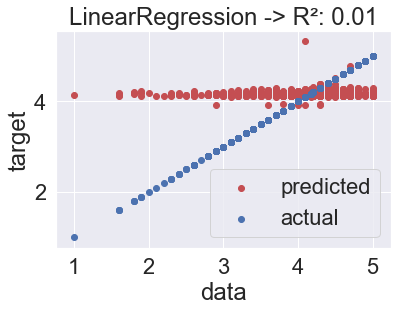

================LinearRegression==================
================KNeighborsRegressor==================
Explained variance score: -0.1296296606629248
Mean absolute error: 0.36188193604515456
Mean squared error: 0.265159360767194
Median squared error: 0.2599999999999989
R² score: -0.12987015462248386



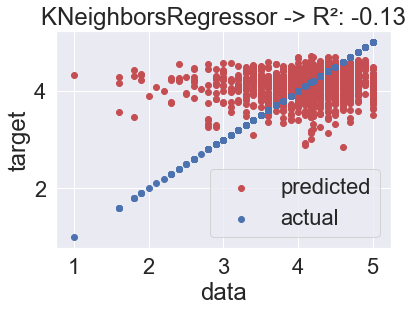

================KNeighborsRegressor==================
================DecisionTreeRegressor==================
Explained variance score: 0.11959035417596431
Mean absolute error: 0.3123306219804066
Mean squared error: 0.20661676721416655
Median squared error: 0.22341376583775308
R² score: 0.11958560299580046



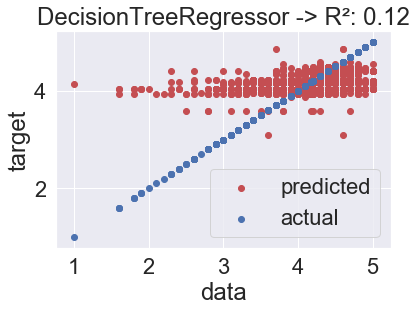

================DecisionTreeRegressor==================
================RandomForestRegressor==================
Explained variance score: 0.12611669146379634
Mean absolute error: 0.3102965477759173
Mean squared error: 0.20508524604214468
Median squared error: 0.21557243099426948
R² score: 0.12611156556575565



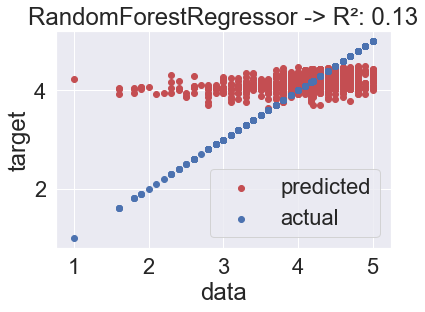

================RandomForestRegressor==================
================GradientBoostingRegressor==================
Explained variance score: 0.15762363652844835
Mean absolute error: 0.3067412842323419
Mean squared error: 0.19780904782800576
Median squared error: 0.21397231646316106
R² score: 0.15711616286711594



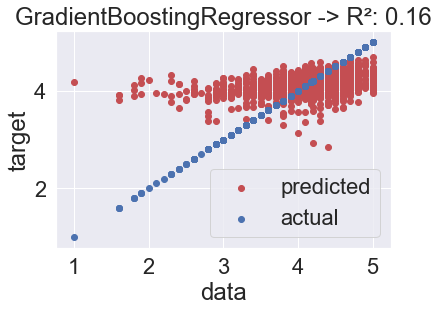

================GradientBoostingRegressor==================
================KernelRidge==================
Explained variance score: -0.08740861591881766
Mean absolute error: 0.33360001550471824
Mean squared error: 0.2555547903521622
Median squared error: 0.2230072912769654
R² score: -0.08894413402673251



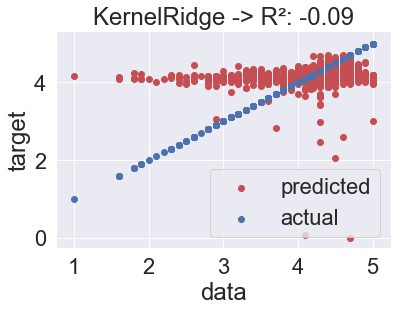

================KernelRidge==================


In [73]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

regressor_list = [linear_model.LinearRegression(),
                  KNeighborsRegressor(),
                  DecisionTreeRegressor(max_depth=5, random_state=10),
                  RandomForestRegressor(max_depth=5, random_state=10),
                  GradientBoostingRegressor(max_depth=5, random_state=10),
                  KernelRidge(kernel='rbf', gamma=0.1)]
for regressor in regressor_list:
    fit_data(regressor)